In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
32,293 cases (7 day average) as of Tue 02 Nov, -617.3 since Mon 01 Nov
847 hospitalised (7 day average) as of Wed 03 Nov, +0.0 since Wed 03 Nov
128 died (7 day average) as of Tue 02 Nov, +0.6 since Mon 01 Nov


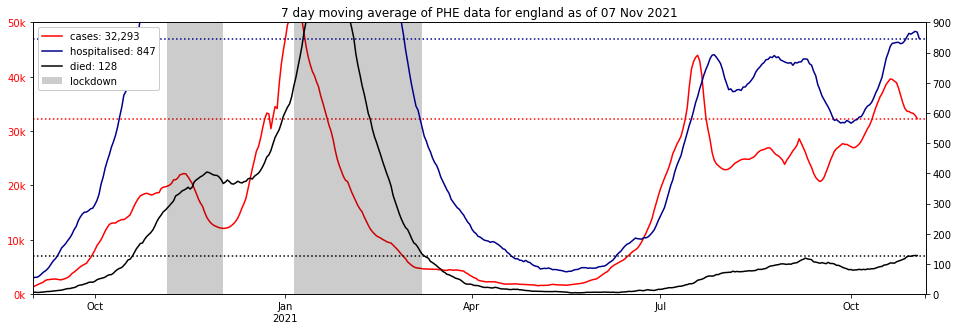

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

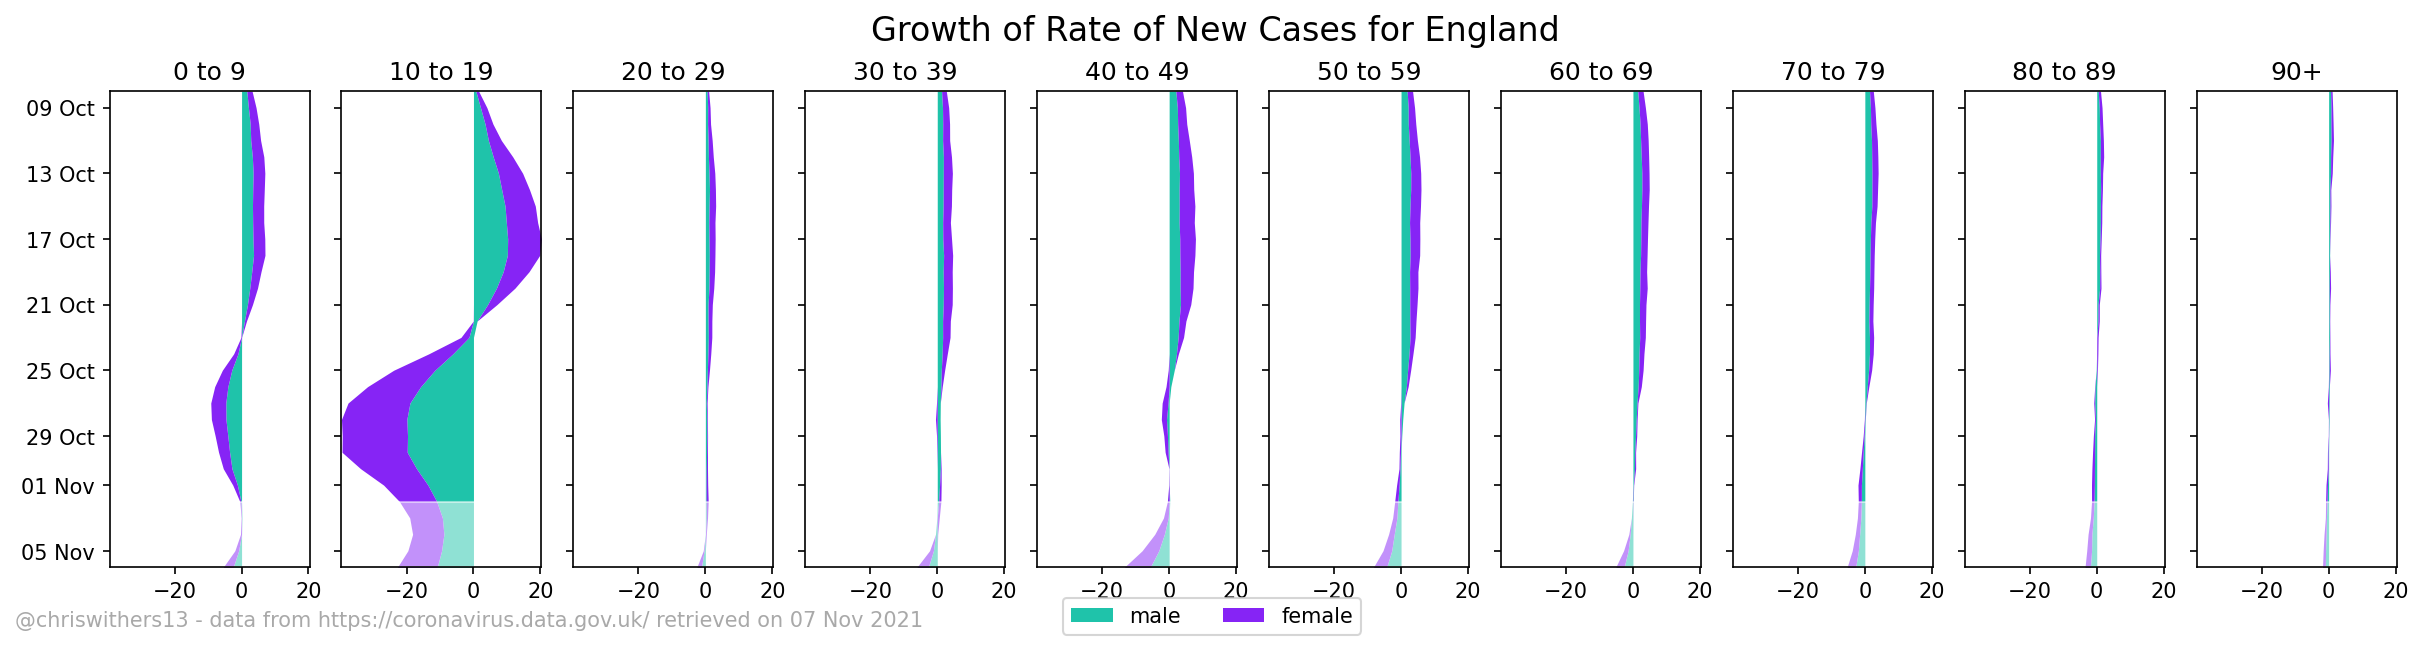

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

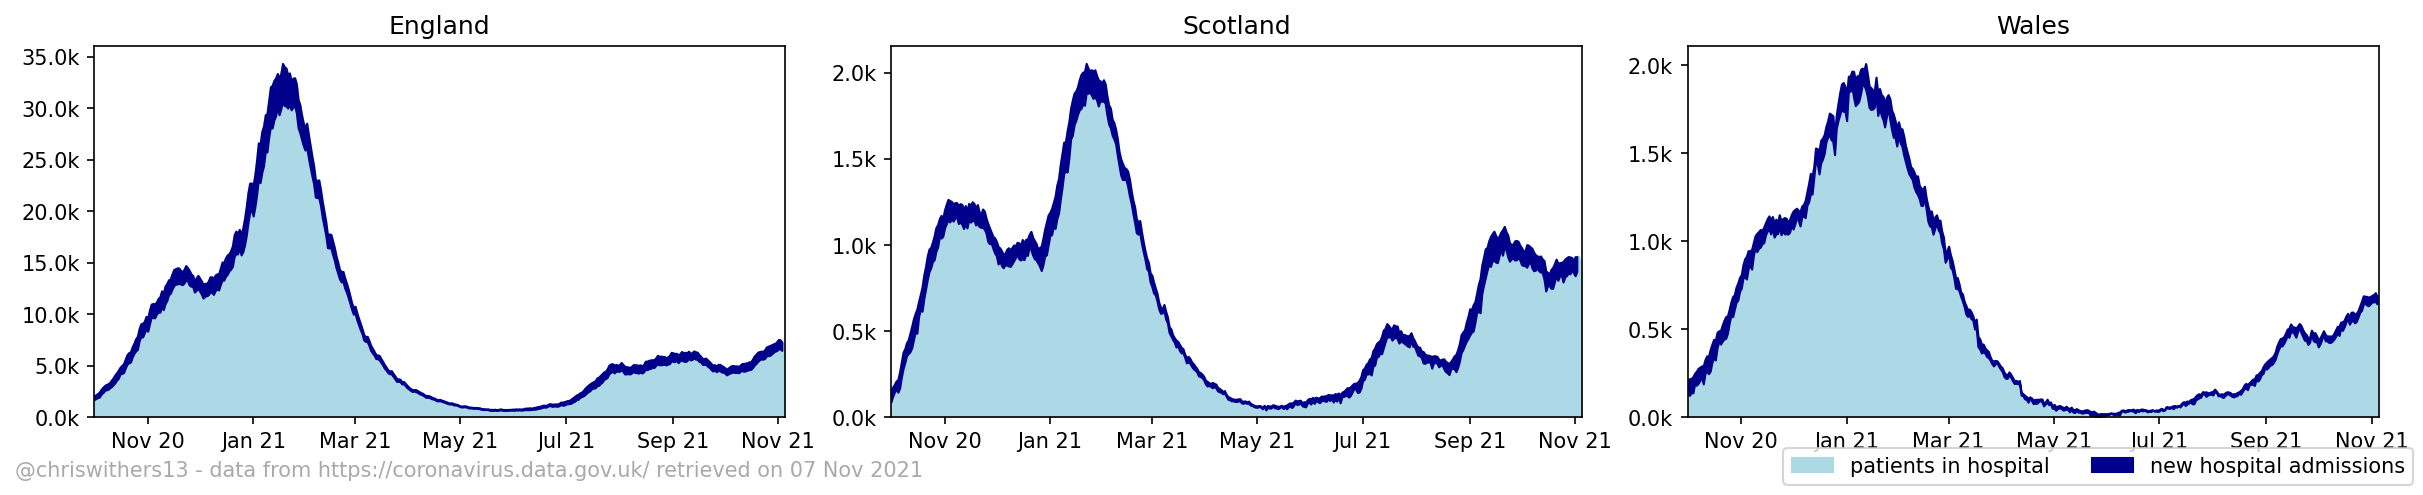

In [5]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

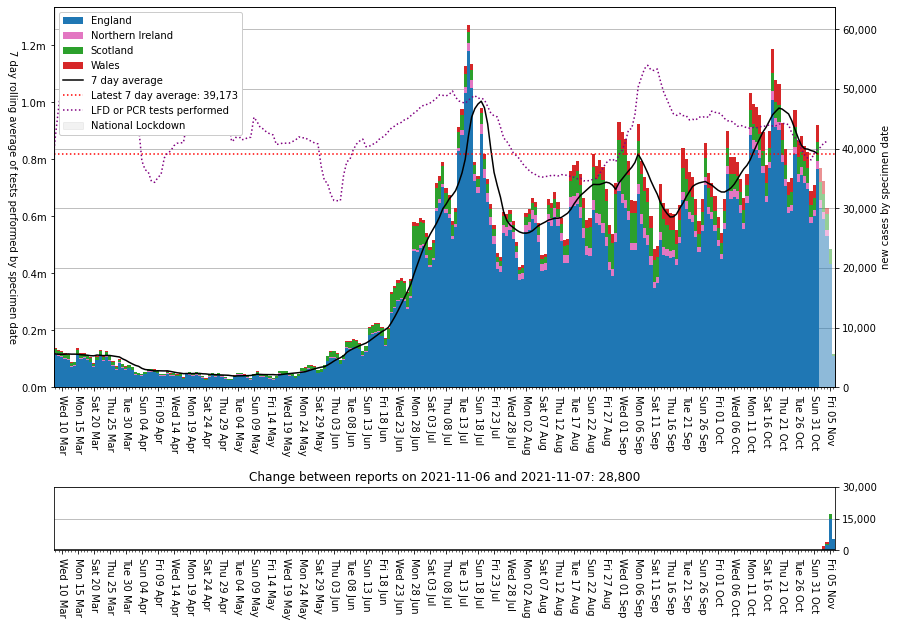

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

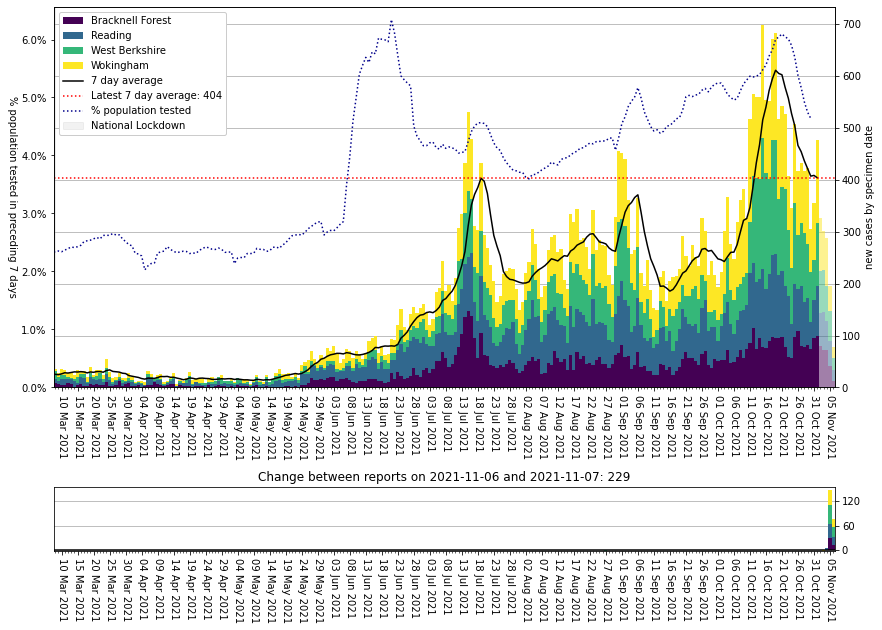

In [7]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

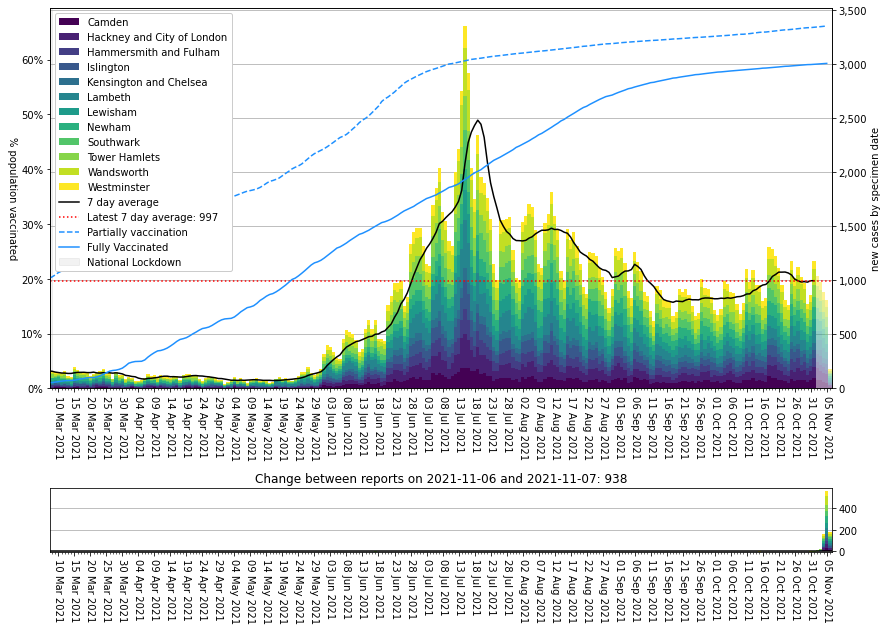

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                   
S12000023             Orkney Islands          592.725640   
S12000013  Comhairle nan Eilean Siar          550.149701   
E07000029                   Copeland          538.257337   
E08000022             North Tyneside          530.991328   
S12000005           Clackmannanshire          508.343035   
E07000088                    Gosport          500.954761   
E07000034               Chesterfield          495.710200   
E07000042                  Mid Devon          494.466110   
W06000014          Vale of Glamorgan          491.065747   
W06000020                    Torfaen          482.114920   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
S12000023                   132.0    2021-11-06  
S12000013                   147.0    2021-11-06  
E07000029                   367.0    2021-11-06  
E08000022                  1104.0    2021-11-06  
S12000005                   262.0    2021-11-06  
E07000088                   425.0    2021-11-06  
E07000034                   520.0    2021-11-06  
E07000042                   407.0    2021-11-06  
W06000014                   656.0    2021-11-05  
W06000020                   453.0    2021-11-05

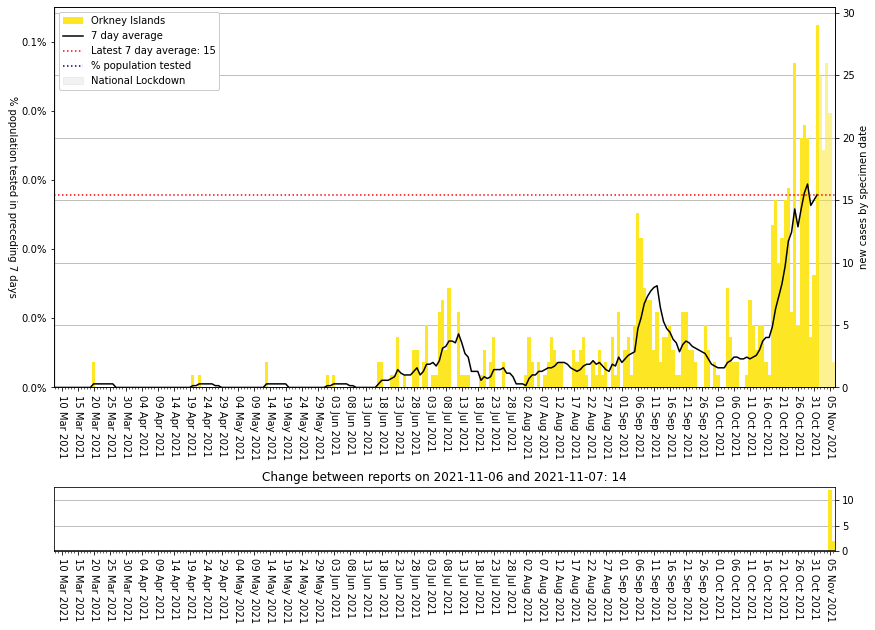

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          235.326883   
E08000035                                Leeds          286.708887   
E06000052         Cornwall and Isles of Scilly          335.430796   
E06000054                            Wiltshire          381.581684   
E06000047                        County Durham          350.315227   
E06000058  Bournemouth, Christchurch and Poole          422.430824   
E08000019                            Sheffield          273.402034   
E06000023                     Bristol, City of          329.321481   
W06000015                              Cardiff          406.374437   
E06000059                               Dorset          385.725004   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  2687.0    2021-11-06  
E08000035                  2274.0    2021-11-06  
E06000052                  1918.0    2021-11-06  
E06000054                  1908.0    2021-11-06  
E06000047                  1857.0    2021-11-06  
E06000058                  1670.0    2021-11-06  
E08000019                  1599.0    2021-11-06  
E06000023                  1526.0    2021-11-06  
W06000015                  1491.0    2021-11-05  
E06000059                  1460.0    2021-11-06

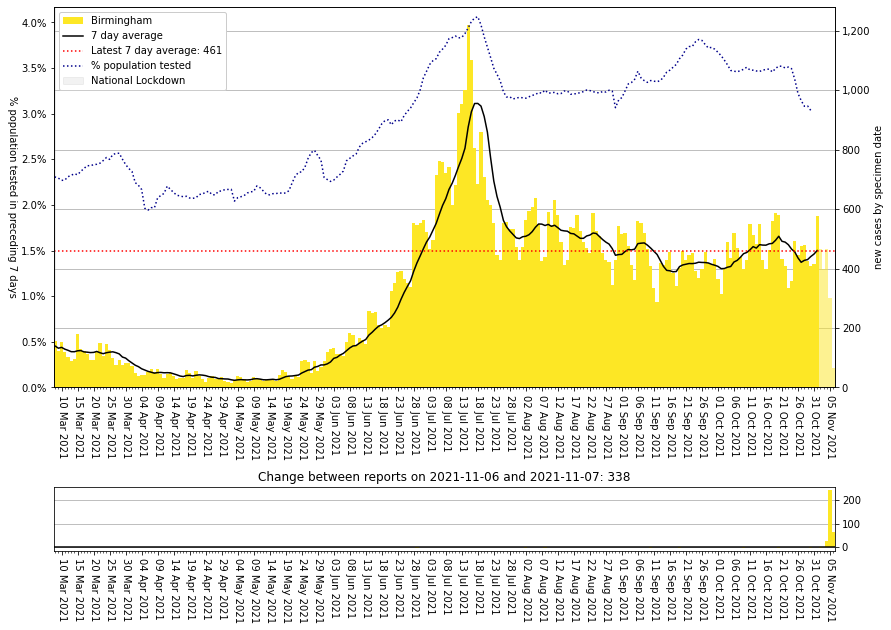

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

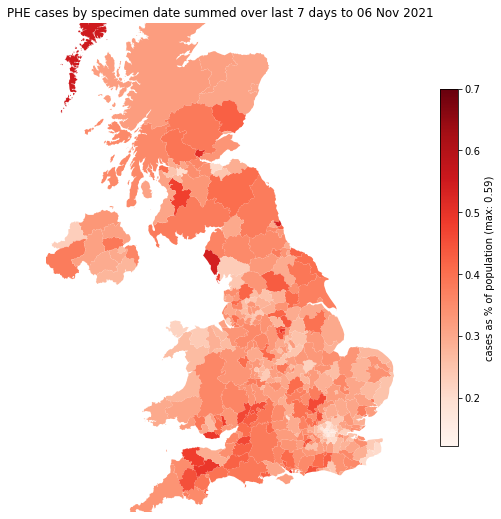

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=0.7)

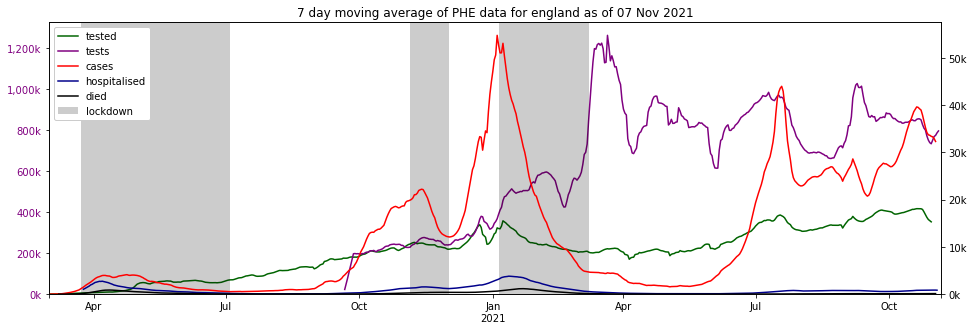

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

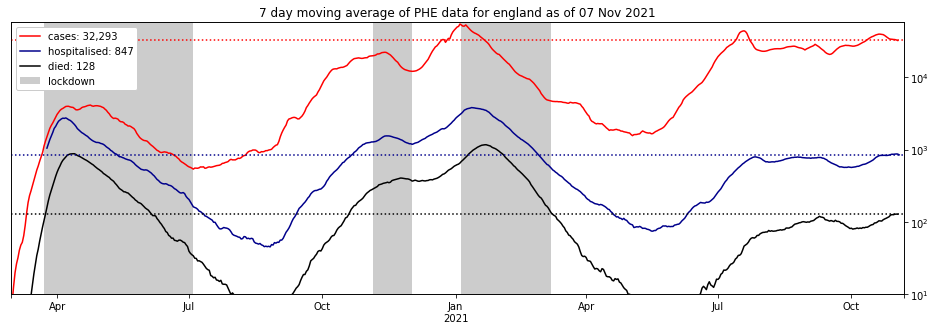

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  38425760.0  42128617.0  3702857.0    56286961   
1  Northern Ireland  N92000002   1248919.0   1334763.0    85844.0     1893667   
2          Scotland  S92000003   3915116.0   4322157.0   407041.0     5463300   
3             Wales  W92000004   2246996.0   2448879.0   201883.0     3152879   

    full_pct  partial_pct   none_pct  
0  68.267605     6.578534  25.153861  
1  65.952409     4.533215  29.514376  
2  71.662109     7.450460  20.887431  
3  71.268070     6.403132  22.328799

'partial: 50,234,416 (75.2%), full: 45,836,791'

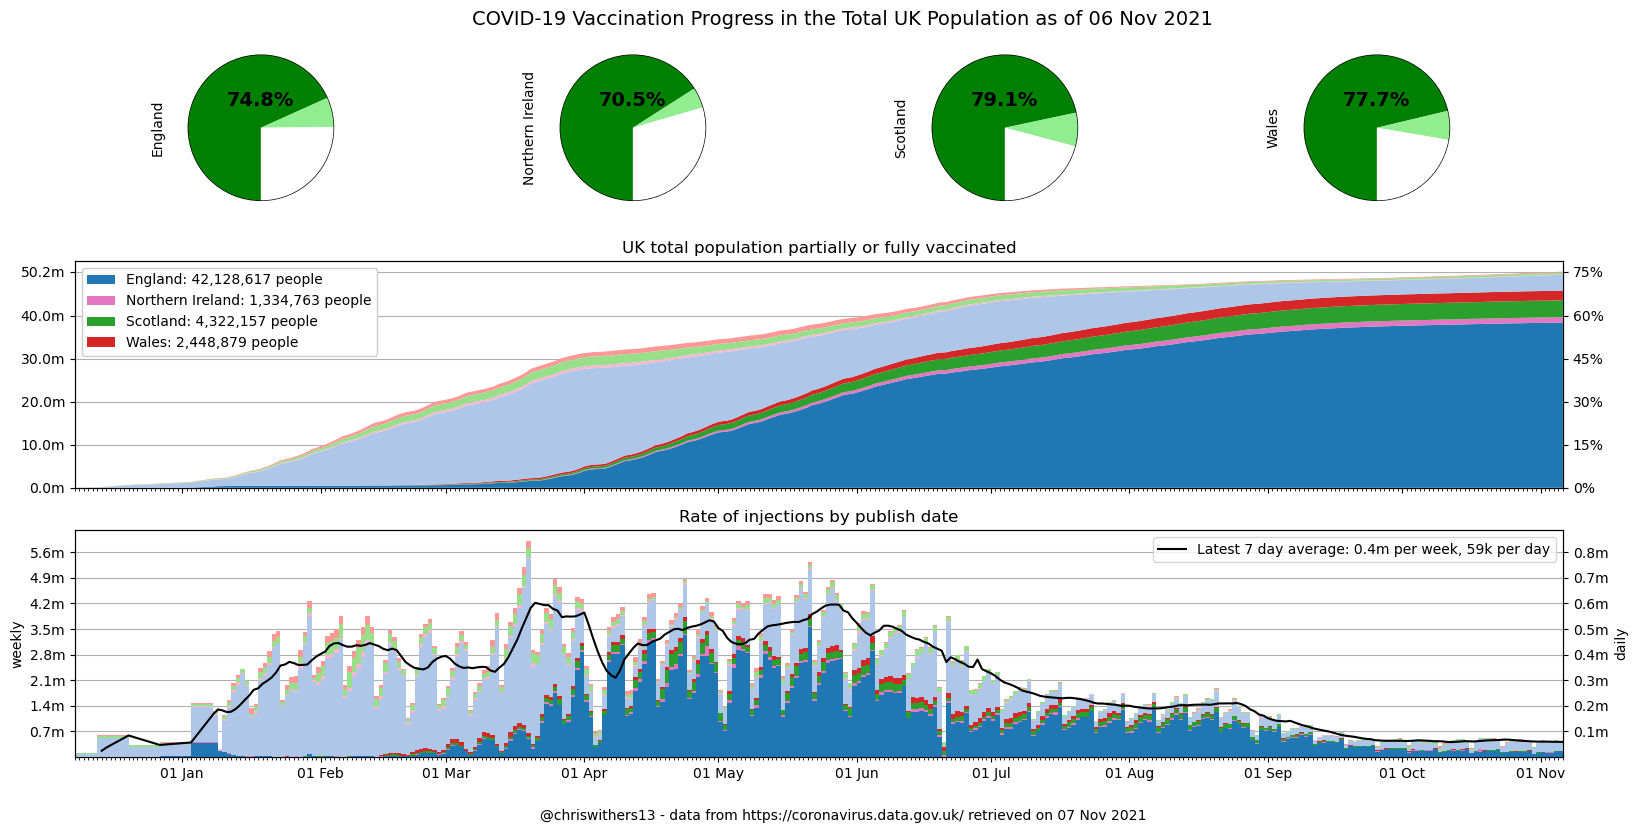

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")